In [1]:
try:
    from fastlane_bot.tools.cpc import ConstantProductCurve as CPC, CurveBase
    from fastlane_bot.testing import *

except:
    from tools.cpc import ConstantProductCurve as CPC, CurveBase
    from tools.testing import *
# from flbtools.cpc import ConstantProductCurve as CPC, CurveBase
# from flbtesting import *

from math import sqrt
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
# from fastlane_bot import __VERSION__
# require("3.0", __VERSION__)

imported m, np, pd, plt, os, sys, decimal; defined iseq, raises, require, Timer
ConstantProductCurve v3.4 (23/Jan/2024)


# CPC for Balancer [NBTest051]

## pvec interface for CPC

In [2]:
c0 = CPC.from_xy(100, 200)
assert c0.tknx == "TKNB"
assert c0.tkny == "TKNQ"
k0 = c0.invariant()
assert iseq(k0, sqrt(100*200))
k1, k2 = c0.invariant(include_target=True)
assert iseq(k0, k1, k2)

In [3]:
x,y,_ = c0.xyfromp_f(c0.p)
xvec = c0.xvecfrompvec_f({c0.tknx: c0.p, c0.tkny: 1} )
assert iseq(x, 100)
assert iseq(y, 200)
assert iseq(xvec[c0.tknx], x)
assert iseq(xvec[c0.tkny], y)
assert iseq(c0.invariant(), c0.invariant(xvec))
assert raises(c0.xvecfrompvec_f, {c0.tknx: c0.p} ).startswith("pvec must contain")
assert raises(c0.xvecfrompvec_f, {c0.tkny: 1} ).startswith("pvec must contain")

In [4]:
p = 1.5*c0.p
x,y,_ = c0.xyfromp_f(p)
xvec  = c0.xvecfrompvec_f({c0.tknx: p, c0.tkny: 1} )
xvec2 = c0.xvecfrompvec_f({c0.tknx: 3*p, c0.tkny: 3} )
xvec3 = c0.xvecfrompvec_f({c0.tknx: 3*p, c0.tkny: 3, "ETH": 15, "BTC": 300} )
assert xvec == xvec2
assert xvec == xvec3
assert iseq(x, 81.64965809277261)
assert iseq(y, 244.9489742783178)
assert iseq(xvec[c0.tknx], x)
assert iseq(xvec[c0.tkny], y)
assert iseq(c0.invariant(), c0.invariant(xvec))

In [5]:
dx,dy,_ = c0.dxdyfromp_f(c0.p)
dxvec = c0.dxvecfrompvec_f({c0.tknx: c0.p, c0.tkny: 1} )
assert abs(dx)<1e-10
assert abs(dy)<1e-10
assert iseq(dxvec[c0.tknx], dx)
assert iseq(dxvec[c0.tkny], dy)
assert raises(c0.dxvecfrompvec_f, {c0.tknx: c0.p} ).startswith("pvec must contain")
assert raises(c0.dxvecfrompvec_f, {c0.tkny: 1} ).startswith("pvec must contain")

In [6]:
p = 1.5*c0.p
dx,dy,_ = c0.dxdyfromp_f(p)
dxvec  = c0.dxvecfrompvec_f({c0.tknx: p, c0.tkny: 1} )
dxvec2 = c0.dxvecfrompvec_f({c0.tknx: 3*p, c0.tkny: 3} )
dxvec3 = c0.dxvecfrompvec_f({c0.tknx: 3*p, c0.tkny: 3, "ETH": 15, "BTC": 300} )
assert dxvec == dxvec2
assert dxvec == dxvec3
assert iseq(dx, -18.35034190722739)
assert iseq(dy, 44.94897427831779)
assert iseq(dxvec[c0.tknx], dx)
assert iseq(dxvec[c0.tkny], dy)

## CurveBase

Checking that `CurveBase` can only instantiate with all functions defined

In [7]:
class CB1(CurveBase):
    pass

class CB2(CurveBase):
    def dxvecfrompvec_f(self, pvec, *, ignorebounds=False):
        pass

class CB3(CurveBase):
    def xvecfrompvec_f(self, pvec, *, ignorebounds=False):
        pass

class CB4(CurveBase):
    def xvecfrompvec_f(self, pvec, *, ignorebounds=False):
        pass
    def dxvecfrompvec_f(self, pvec, *, ignorebounds=False):
        pass
    def invariant(self, xvec=None, *, include_target=False):
        pass
    
assert raises(CB1).startswith("Can't instantiate abstract class")
assert raises(CB2).startswith("Can't instantiate abstract class")
assert raises(CB3).startswith("Can't instantiate abstract class")
assert not raises(CB4)

In [8]:
assert isinstance(CPC.from_xy(100, 200), CurveBase)

## Constant product constructor

In [9]:
c0 = CPC.from_xy(100, 200)
assert c0.x == 100
assert c0.y == 200
assert c0.k == 20000
assert c0.x == c0.x_act
assert c0.y == c0.y_act
assert c0.alpha == 0.5
assert c0.eta == 1
assert c0.constr == "xy"
assert c0.is_constant_product() == True
c0

ConstantProductCurve(k=20000, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xy', params={})

In [10]:
assert c0.asdict() == {
    'k': 20000,
    'x': 100,
    'x_act': 100,
    'y_act': 200.0,
    'alpha': 0.5,
    'pair': 'TKNB/TKNQ',
    'cid': 'None',
    'fee': None,
    'descr': None,
    'constr': 'xy',
    'params': {}
}

In [11]:
c1 = CPC.from_xyal(100, 200)
assert c1.constr == "xyal"
assert c1.is_constant_product() == True
assert c1==c0
c1

ConstantProductCurve(k=20000.0, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [12]:
assert c1.asdict() == {
    'k': 20000,
    'x': 100,
    'x_act': 100,
    'y_act': 200.0,
    'alpha': 0.5,
    'pair': 'TKNB/TKNQ',
    'cid': 'None',
    'fee': None,
    'descr': None,
    'constr': 'xyal',
    'params': {}
}

In [13]:
c2 = CPC.from_xyal(100, 200, alpha=0.5)
assert c2.constr == "xyal"
assert c2.is_constant_product() == True
assert c2==c0
assert c2.asdict() == c1.asdict()
c2

ConstantProductCurve(k=20000.0, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [14]:
c3 = CPC.from_xyal(100, 200, eta=1)
assert c3.constr == "xyal"
assert c3.is_constant_product() == True
assert c3==c0
assert c3.asdict() == c1.asdict()
c3

ConstantProductCurve(k=20000.0, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [15]:
assert raises(CPC.from_xyal, 100, 200, 
       alpha=0.5, eta=1) == 'at most one of alpha and eta must be given [0.5, 1]'

## Weighted constructor

In [16]:
c0 = CPC.from_xy(100, 200)
assert c0.x == 100
assert c0.y == 200
assert c0.k == 20000
assert c0.x == c0.x_act
assert c0.y == c0.y_act
assert c0.alpha == 0.5
assert c0.eta == 1
assert c0.constr == "xy"
assert iseq(c0.invariant(), c0.kbar)
assert c0.is_constant_product() == True
c0

ConstantProductCurve(k=20000, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xy', params={})

In [17]:
c1 = CPC.from_xyal(100, 200)
assert c1.constr == "xyal"
assert c1.is_constant_product() == True
assert c1 == c0
assert c1.asdict()["alpha"] == 0.5
assert iseq(c1.invariant(), c1.kbar)
c1

ConstantProductCurve(k=20000.0, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [18]:
c2 = CPC.from_xyal(100, 200, alpha=0.25)
assert c2.constr == "xyal"
assert c2.is_constant_product() == False
assert c2.alpha == 0.25
assert c2.asdict()["alpha"] == 0.25
assert iseq(c2.eta, 0.25/0.75)
assert iseq(c2.invariant(), c2.kbar)
assert c2 != c0
assert c2 != c1
c2

ConstantProductCurve(k=800000000.0, x=100, x_act=100, y_act=199.99999999999994, alpha=0.25, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [19]:
c3 = CPC.from_xyal(100, 200, alpha=0.8)
assert c3.constr == "xyal"
assert c3.is_constant_product() == False
assert iseq(c3.alpha, 0.8)
assert c3.asdict()["alpha"] == 0.8
assert iseq(c3.eta, 0.8/0.2)
assert iseq(c3.invariant(), c3.kbar)
assert c3 != c0
assert c3 != c1
assert c3 != c2
c2

ConstantProductCurve(k=800000000.0, x=100, x_act=100, y_act=199.99999999999994, alpha=0.25, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [20]:
c3b = CPC.fromdict(c3.asdict())
assert c3b == c3
c3b

ConstantProductCurve(k=376.06030930863926, x=100, x_act=100, y_act=200.0, alpha=0.8, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [21]:
assert raises(CPC.from_xyal,100, 200, alpha=0) == 'alpha must be > 0 [0]'
assert raises(CPC.from_xyal,100, 200, alpha=-1) == 'alpha must be > 0 [-1]'
assert raises(CPC.from_xyal,100, 200, alpha=1) == 'alpha must be < 1 [1]'
assert raises(CPC.from_xyal,100, 200, alpha=2) == 'alpha must be < 1 [2]'

In [22]:
raises(CPC.from_xyal,100, 200, alpha=0)

'alpha must be > 0 [0]'

In [23]:
assert not raises(CPC.from_xyal,100, 200, alpha=1-1e-10)
assert not raises(CPC.from_xyal,100, 200, alpha=0.01)

In [24]:
raises(CPC.from_xyal,100, 200, alpha=0.001)

"(34, 'Result too large')"

## High level testing of all functions

(including not YET implemented)

In [25]:
c0 = CPC.from_xyal(100, 200)
assert c0.is_constant_product() == True
c0

ConstantProductCurve(k=20000.0, x=100, x_act=100, y_act=200.0, alpha=0.5, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

In [26]:
c1 = CPC.from_xyal(100, 200, alpha=0.25)
assert c1.is_constant_product() == False
c1

ConstantProductCurve(k=800000000.0, x=100, x_act=100, y_act=199.99999999999994, alpha=0.25, pair='TKNB/TKNQ', cid='None', fee=None, descr=None, constr='xyal', params={})

#### Not (yet) implemented functions

Those function groups are not currently planned to be implemented at all

- `execute` as there is no need to simulate those curves for the time being; that was a Carbon thing

The functions we may implement at a later stage are

- `description` should probably be updated, but it is tedious; `format` ditto
- `x_max`, `x_min`, `p_max`, `p_min` and the other leverage functions once we consider it important and safe

execute

In [27]:
assert not raises(c0.execute)
assert raises(c1.execute).startswith("only implemented for")

description and format

In [28]:
assert not raises(c0.description)
assert raises(c1.description).startswith("only implemented for")

In [29]:
assert not raises(c0.format)
assert raises(c1.format).startswith("only implemented for")

leverage related functions (primary)

In [30]:
assert not raises(lambda: c0.p_max)
assert not raises(lambda: c1.p_max)

In [31]:
assert not raises(lambda: c0.p_min)
assert not raises(lambda: c1.p_min)

In [32]:
assert not raises(lambda: c0.x_min)
assert not raises(lambda: c1.x_min)

In [33]:
assert not raises(lambda: c0.x_max)
assert not raises(lambda: c1.x_max)

In [34]:
assert not raises(lambda: c0.y_min)
assert not raises(lambda: c1.y_min)

In [35]:
assert not raises(lambda: c0.y_max)
assert not raises(lambda: c1.y_max)

leverage related functions (secondary, ie calling primary ones)

In [36]:
assert not raises(c0.p_max_primary)
assert not raises(c1.p_max_primary)

In [37]:
assert not raises(c0.p_min_primary)
assert not raises(c1.p_min_primary)

In [38]:
assert not raises(lambda: c0.at_xmin)
assert not raises(lambda: c1.at_xmin)

In [39]:
assert not raises(lambda: c0.at_xmax)
assert not raises(lambda: c1.at_xmax)

In [40]:
assert not raises(lambda: c0.at_ymin)
assert not raises(lambda: c1.at_ymin)

In [41]:
assert not raises(lambda: c0.at_ymax)
assert not raises(lambda: c1.at_ymax)

In [42]:
assert not raises(lambda: c0.at_boundary)
assert not raises(lambda: c1.at_boundary)

todo

In [43]:
assert not raises(c0.xyfromp_f)
assert not raises(c1.xyfromp_f)

In [44]:
assert not raises(c0.dxdyfromp_f)
assert not raises(c1.dxdyfromp_f)

#### Implemented functions

In [45]:
assert not raises(lambda: c0.y)
assert not raises(lambda: c1.y)

In [46]:
assert not raises(lambda: c0.p)
assert not raises(lambda: c1.p)

In [47]:
assert not raises(lambda: c0.kbar)
assert not raises(lambda: c1.kbar)

In [48]:
assert not raises(c0.tvl)
assert not raises(c1.tvl)

In [49]:
assert not raises(c0.yfromx_f, 110)
assert not raises(c1.yfromx_f, 110, ignorebounds=True)
assert not raises(c1.yfromx_f, 110, ignorebounds=False)

In [50]:
assert not raises(c0.xfromy_f, 210)
assert not raises(c1.xfromy_f, 110, ignorebounds=True)
assert not raises(c1.xfromy_f, 110, ignorebounds=False)

In [51]:
assert not raises(c0.dyfromdx_f, 1)
assert not raises(c1.dyfromdx_f, 1, ignorebounds=True)
assert not raises(c1.dyfromdx_f, 1, ignorebounds=False)

In [52]:
assert not raises(c0.dxfromdy_f, 1)
assert not raises(c1.dxfromdy_f, 1, ignorebounds=True)
assert not raises(c1.dxfromdy_f, 1, ignorebounds=False)

## Simple Tests

In [53]:
c0 = CPC.from_xyal(100, 200)
c1 = CPC.from_xyal(100, 200, eta=2)
c2 = CPC.from_xyal(100, 200, eta=0.5)

In [54]:
assert iseq(c0.alpha, 1/2)
assert iseq(c1.alpha, 2/3)
assert iseq(c2.alpha, 1/3)

#### Current token balance $y$

$$
y = \left( \frac k x \right)^\eta
$$

In [55]:
assert iseq(c0.y, 200)
assert iseq(c1.y, 200)
assert iseq(c2.y, 200)

#### Current price $p$

$$
p = \eta\, \frac y x
$$

In [56]:
assert iseq(c0.p, 2 * c0.eta)
assert iseq(c1.p, 2 * c1.eta)
assert iseq(c2.p, 2 * c2.eta)

#### TVL

$$
\mathrm{TVL} = x_a*p + y_a
$$

In [57]:
assert c0.x == c0.x_act
assert c0.y == c0.y_act
assert c1.x == c1.x_act
assert c1.y == c1.y_act
assert c2.x == c2.x_act
assert c2.y == c2.y_act

In [58]:
assert iseq(c0.tvl(), 100 * c0.p + 200)
assert iseq(c1.tvl(), 100 * c1.p + 200)
assert iseq(c2.tvl(), 100 * c2.p + 200)

#### Pool constant $k$

$$
k^\alpha = x^\alpha\, y^{1-\alpha}
$$

$$
k = x\,y^\frac{1-\alpha}{\alpha} = x\,y^{\frac 1 \eta}
$$


In [59]:
assert iseq(c0.k**(1/2), c0.x**(1/2) * c0.y**(1/2))
assert iseq(c1.k**(2/3), c1.x**(2/3) * c1.y**(1/3))
assert iseq(c2.k**(1/3), c1.x**(1/3) * c1.y**(2/3))

#### Pool constant $\bar k$

$$
x^\alpha\, y^{1-\alpha} = \bar k = k^\alpha
$$

In [60]:
assert iseq(c0.kbar, c0.x**(1/2) * c0.y**(1/2))
assert iseq(c1.kbar, c1.x**(2/3) * c1.y**(1/3))
assert iseq(c2.kbar, c1.x**(1/3) * c1.y**(2/3))

In [61]:
assert iseq(c0.kbar, c0.k**c0.alpha)
assert iseq(c1.kbar, c1.k**c1.alpha)
assert iseq(c2.kbar, c2.k**c2.alpha)

#### Token balance function $y(x)$

$$
y(x) = \left( \frac k x \right)^\eta
$$

In [62]:
assert c0.eta == 1
assert iseq(c0.yfromx_f(100, ignorebounds=True),  200)
assert iseq(c0.yfromx_f( 50, ignorebounds=True),  400)
assert iseq(c0.yfromx_f(200, ignorebounds=True),  100)

In [63]:
assert iseq(c1.eta, 2)
assert iseq(c1.yfromx_f(100, ignorebounds=True),  200)
assert iseq(c1.yfromx_f( 50, ignorebounds=True),  200*2**2)
assert iseq(c1.yfromx_f(200, ignorebounds=True),  200/2**2)

In [64]:
assert iseq(c2.eta, 1/2)
assert iseq(c2.yfromx_f(100, ignorebounds=True),  200)
assert iseq(c2.yfromx_f( 50, ignorebounds=True),  200*sqrt(2))
assert iseq(c2.yfromx_f(200, ignorebounds=True),  200/sqrt(2))

#### Token balance function $x(y)$

$$
x(y) 
= \frac{k}{ y^{\frac{1-\alpha}{\alpha}} }
= \frac{k}{ y^{\frac{1}{\eta}} }
$$

In [65]:
assert c0.eta == 1
assert iseq(c0.xfromy_f(200, ignorebounds=True),  100)
assert iseq(c0.xfromy_f(100, ignorebounds=True),  200)
assert iseq(c0.xfromy_f(400, ignorebounds=True),   50)

In [66]:
assert iseq(c1.eta, 2)
assert iseq(c1.xfromy_f(200, ignorebounds=True),  100)
assert iseq(c1.xfromy_f(100, ignorebounds=True),  100*2**0.5)
assert iseq(c1.xfromy_f(400, ignorebounds=True),  100/2**0.5)

In [67]:
assert iseq(c2.eta, 1/2)
assert iseq(c2.xfromy_f(200, ignorebounds=True),  100)
assert iseq(c2.xfromy_f(100, ignorebounds=True),  100*2**2)
assert iseq(c2.xfromy_f(400, ignorebounds=True),  100/2**2)

#### Price response function $(x(p), y(p))$

$$
x(p) 
= 
\left(\frac \eta p\right)^{1-\alpha} k^\alpha
$$

$$
y(p) = \left( \frac{kp}{\eta}  \right)^\alpha
$$

In [68]:
assert iseq(c0.xyfromp_f(c0.p, ignorebounds=True)[0], c0.x)
assert iseq(c1.xyfromp_f(c1.p, ignorebounds=True)[0], c1.x)
assert iseq(c2.xyfromp_f(c2.p, ignorebounds=True)[0], c2.x)

In [69]:
assert iseq(c0.xyfromp_f(c0.p, ignorebounds=True)[1], c0.y)
assert iseq(c1.xyfromp_f(c1.p, ignorebounds=True)[1], c1.y)
assert iseq(c2.xyfromp_f(c2.p, ignorebounds=True)[1], c2.y)

In [70]:
for ci in [c0, c1, c2]:
    for p in [2, 1, 4]:
        eta_over_p = ci.eta / p
        x = eta_over_p ** (1-ci.alpha) * ci.kbar
        y = 1/eta_over_p**ci.alpha * ci.kbar
        xx, yy, pp = ci.xyfromp_f  (p, ignorebounds=True)
        dx, dy, _  = ci.dxdyfromp_f(p, ignorebounds=True)
        assert iseq(x, xx)
        assert iseq(y, yy)
        assert iseq(p, pp)
        assert iseq(dx, xx-ci.x)
        assert iseq(dy, yy-ci.y)

## Consistency tests

In [71]:
c0 = CPC.from_xyal(100, 200)
c1 = CPC.from_xyal(100, 200, eta=2)
c2 = CPC.from_xyal(100, 200, eta=0.5)
cc = [c0, c1, c2]

In [72]:
assert iseq(c0.alpha, 1/2)
assert iseq(c1.alpha, 2/3)
assert iseq(c2.alpha, 1/3)

### Assert inversions

$$
y(x(y)) = y
$$

and vice versa

In [73]:
for xy in np.logspace(1, 3, 100):
    for ci in cc:
        #print(f"xy={xy}, eta={ci.eta}")
        assert iseq(ci.yfromx_f(ci.xfromy_f(xy, ignorebounds=True), ignorebounds=True), xy)
        assert iseq(ci.xfromy_f(ci.yfromx_f(xy, ignorebounds=True), ignorebounds=True), xy)

### Assert that prices are correct

$$
p \simeq -\frac{\Delta y}{\Delta x}
$$

In [74]:
for alpha in np.linspace(0.01, 0.99, 100):
    ci = CPC.from_xyal(100, 200, alpha=alpha)
    dy = ci.yfromx_f(ci.x+0.1, ignorebounds=True)-ci.yfromx_f(ci.x-0.1, ignorebounds=True)
    assert iseq(dy/0.2, -ci.p, eps=1e-2), f"error: {dy/0.2/ci.p+1}"

### Check `dyfromdx_f` against `yfromx_f`

In [75]:
for dxy in np.linspace(0.1, 99, 100):
    for ci in cc:
        assert iseq(ci.dyfromdx_f(dxy, ignorebounds=True),
                    (ci.yfromx_f(ci.x+dxy, ignorebounds=True)-ci.y))
        assert iseq(ci.dxfromdy_f(dxy, ignorebounds=True),
                    (ci.xfromy_f(ci.y+dxy, ignorebounds=True)-ci.x))

## Charts [NOTEST]

In [76]:
plt.style.use('seaborn-v0_8-dark')
plt.rcParams['figure.figsize'] = [12,6] # only picked up at second run (?!?)

In [77]:
c0 = CPC.from_xyal(100, 200)
c1 = CPC.from_xyal(100, 200, eta=2)
c2 = CPC.from_xyal(100, 200, eta=0.5)
cc = [c0, c1, c2]
xvals = np.linspace(50,200)
pvals = np.linspace(1,4)

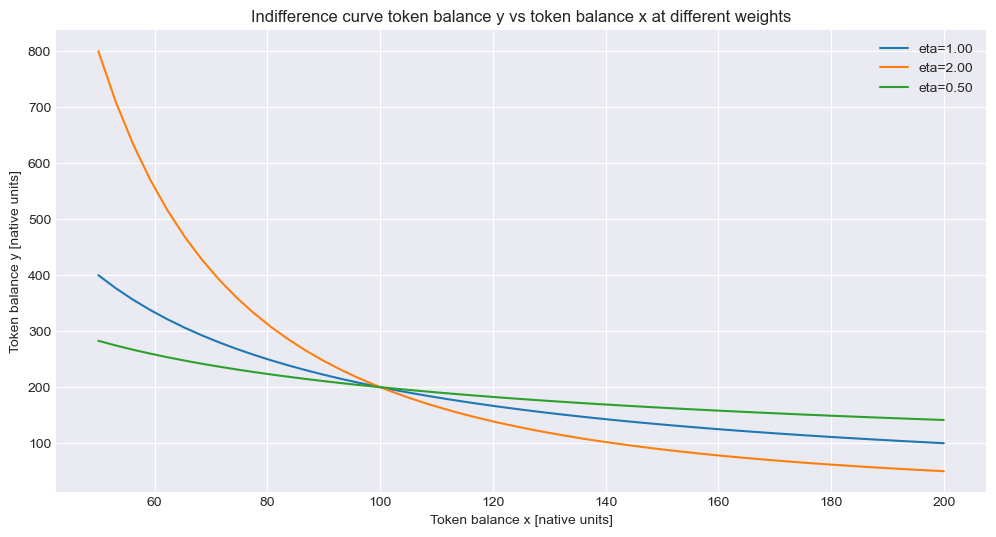

In [78]:
for ci in cc:
    plt.plot(xvals, [ci.yfromx_f(x, ignorebounds=True) for x in xvals], label=f"eta={ci.eta:0.2f}")
plt.grid()
plt.legend()
plt.title("Indifference curve token balance y vs token balance x at different weights")
plt.xlabel("Token balance x [native units]")
plt.ylabel("Token balance y [native units]")
plt.show()

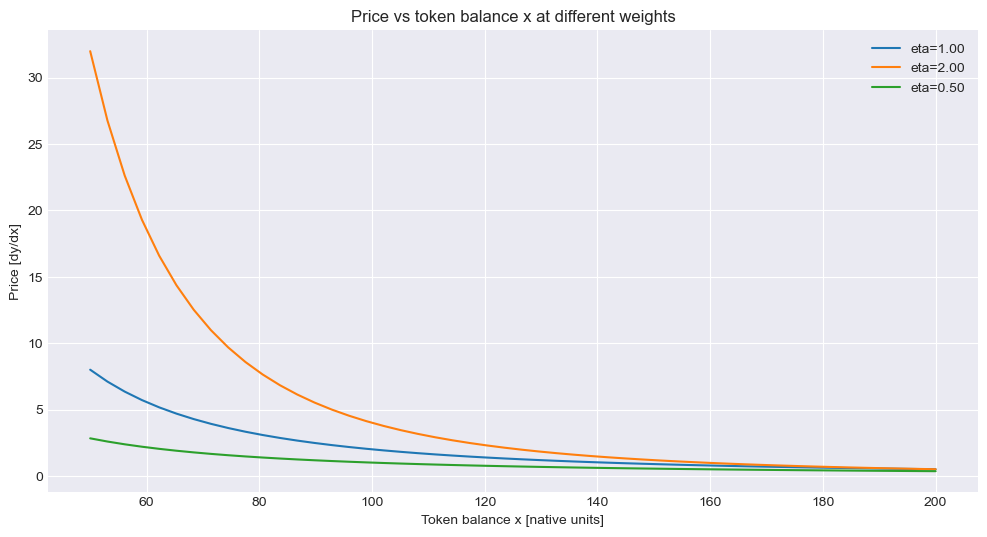

In [79]:
for ci in cc:
    plt.plot(
        xvals, 
        [
            -(ci.yfromx_f(x+0.1, ignorebounds=True) - ci.yfromx_f(x-0.1, ignorebounds=True))/0.2
            for x in xvals
        
        ], 
        label=f"eta={ci.eta:0.2f}")
plt.grid()
plt.legend()
plt.title("Price vs token balance x at different weights")
plt.xlabel("Token balance x [native units]")
plt.ylabel("Price [dy/dx]")
plt.show()

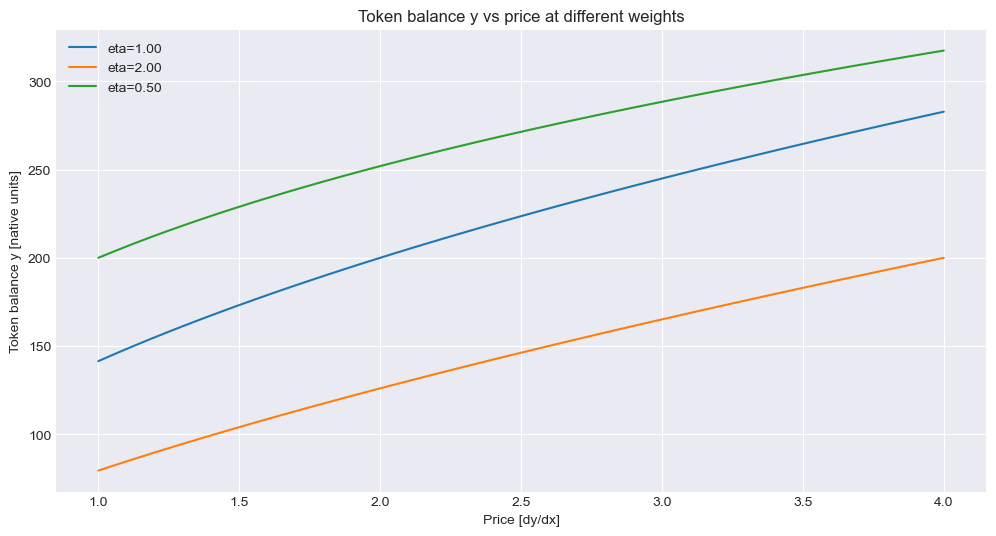

In [80]:
for ci in cc:
    plt.plot(
        pvals, 
        [
            ci.xyfromp_f(p, ignorebounds=True)[1]
            for p in pvals
        
        ], 
        label=f"eta={ci.eta:0.2f}")
plt.grid()
plt.legend()
plt.title("Token balance y vs price at different weights")
plt.xlabel("Price [dy/dx]")
plt.ylabel("Token balance y [native units]")
plt.show()